In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_lsq_spline

In [38]:
# Load image and convert to grayscale
img = cv2.imread("imgs/everest.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape

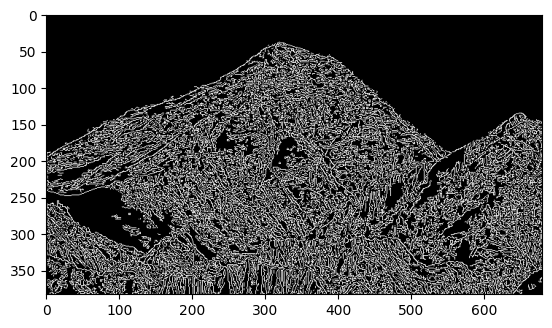

In [39]:
# Edge detection
edges = cv2.Canny(gray, 50, 150)

plt.imshow(edges, cmap='gray')
plt.show()

In [40]:
# Extract skyline
x_coords = []
y_coords = []

for x in range(width):
    ys = np.where(edges[:, x])[0]
    if len(ys) > 0:
        y_coords.append(ys.min())
        x_coords.append(x)

x_coords = np.array(x_coords)
y_coords = np.array(y_coords)

In [ ]:
# Flip y-axis
y_coords = height - 1 - y_coords

In [ ]:
# Fit B-spline
degree = 2
num_control_points = 35

x_min, x_max = x_coords.min(), x_coords.max()
inner_knots = np.linspace(x_min, x_max, num_control_points - degree + 1)
knot_vector = np.concatenate((
    np.full(degree, x_min),
    inner_knots,
    np.full(degree, x_max)
))

spline = make_lsq_spline(x_coords, y_coords, knot_vector, k=degree)

In [43]:
# Evaluate spline
x_fine = np.linspace(x_min, x_max, 1000)
y_spline = spline(x_fine)

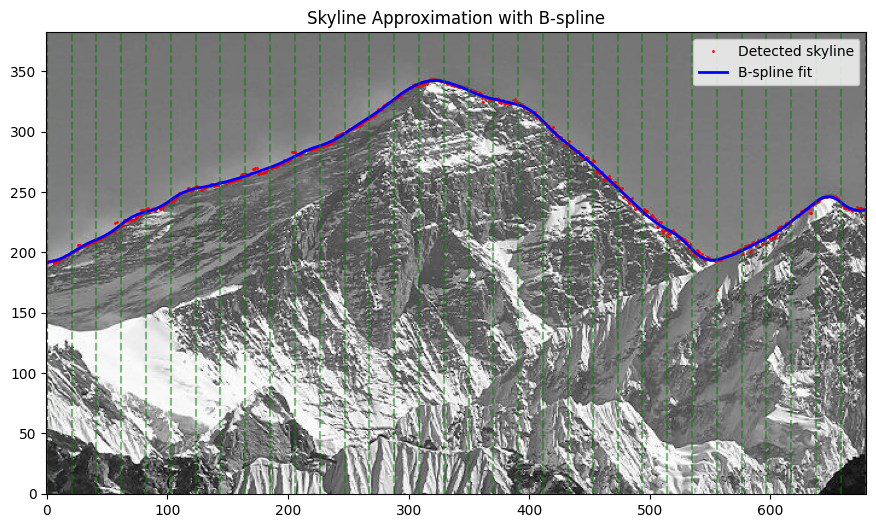

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(np.flipud(gray), cmap='gray', origin="lower")
plt.plot(x_coords, y_coords, 'r.', markersize=2, label="Detected skyline")
plt.plot(x_fine, y_spline, 'b-', linewidth=2, label="B-spline fit")

for k in spline.t:
    plt.axvline(k, color='green', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

In [45]:
print("knots =", list(map(lambda x: round(float(x)), spline.t)))
print("coeffs =", list(map(lambda x: round(float(x)), spline.c)))

knots = [0, 0, 0, 21, 41, 62, 82, 103, 123, 144, 165, 185, 206, 226, 247, 267, 288, 309, 329, 350, 370, 391, 412, 432, 453, 473, 494, 514, 535, 556, 576, 597, 617, 638, 658, 679, 679, 679]
coeffs = [192, 193, 207, 215, 232, 236, 251, 255, 260, 267, 274, 285, 291, 305, 319, 335, 344, 339, 329, 325, 320, 298, 282, 263, 244, 225, 214, 192, 196, 206, 217, 234, 250, 233, 235]
